<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/EnP_training/SPE_assignment2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment of Session 3 and 4

Welcome to the assignment! 

Few things you should note:

* First follow instructions and read the problem statement in the assignment PowerPoint
* You will be coding in this notebook
* To help you coding, follow along our Session 3 and 4 tutorial notebooks.
* Once you have finished, download this notebook (make sure you have renamed the notebook) and submit to Google Classroom. 

Your deadline is Tuesday, 24 November 2020 at 0.00 UTC

## Assignment 1: Formation Evaluation

Run this cell to get all the data and functions, all at once

In [ ]:
!git clone https://github.com/yohanesnuwara/formation-evaluation

import sys
sys.path.append('/content/formation-evaluation')

# these are the functions that we will use
from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot
from label_generator import label_generator

# these are the filepaths of the data
well_log_filepath = '/content/formation-evaluation/data/volve/15_9-F-11A.LAS'
well_top_filepath = '/content/formation-evaluation/data/volve/Fmtops_15_9-F-11A.csv'

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 105 (delta 45), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (105/105), 8.03 MiB | 3.14 MiB/s, done.
Resolving deltas: 100% (45/45), done.


Start your codes from here

In [ ]:
!pip install lasio
import lasio
well = lasio.read(well_log_filepath)
well.keys()
well.curves
well.data


array([[ 188.5,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.6,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.7,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [3761.7,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.8,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.9,    nan,    nan, ...,    nan,    nan,    nan]])

In [ ]:
well = well.df().reset_index()

In [ ]:
import pandas as pd
tops = pd.read_csv(well_top_filepath)
tops

,PICKS,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8
5,Heather Fm. Top,3574.9
6,Heather Fm. Sand VOLVE Top,3585.2
7,Hugin Fm. VOLVE Top,3594.6
8,Sleipner Fm. Top,3702.0


In [ ]:
well = label_generator(well,tops,'DEPTH','FMLOG')
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FMLOG
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


In [ ]:
well['FMLOG'] = well['FMLOG'].fillna('Unknown')
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FMLOG
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


### Visualize ROP, DRHO, RD, RMED, DTS, and PEF logs

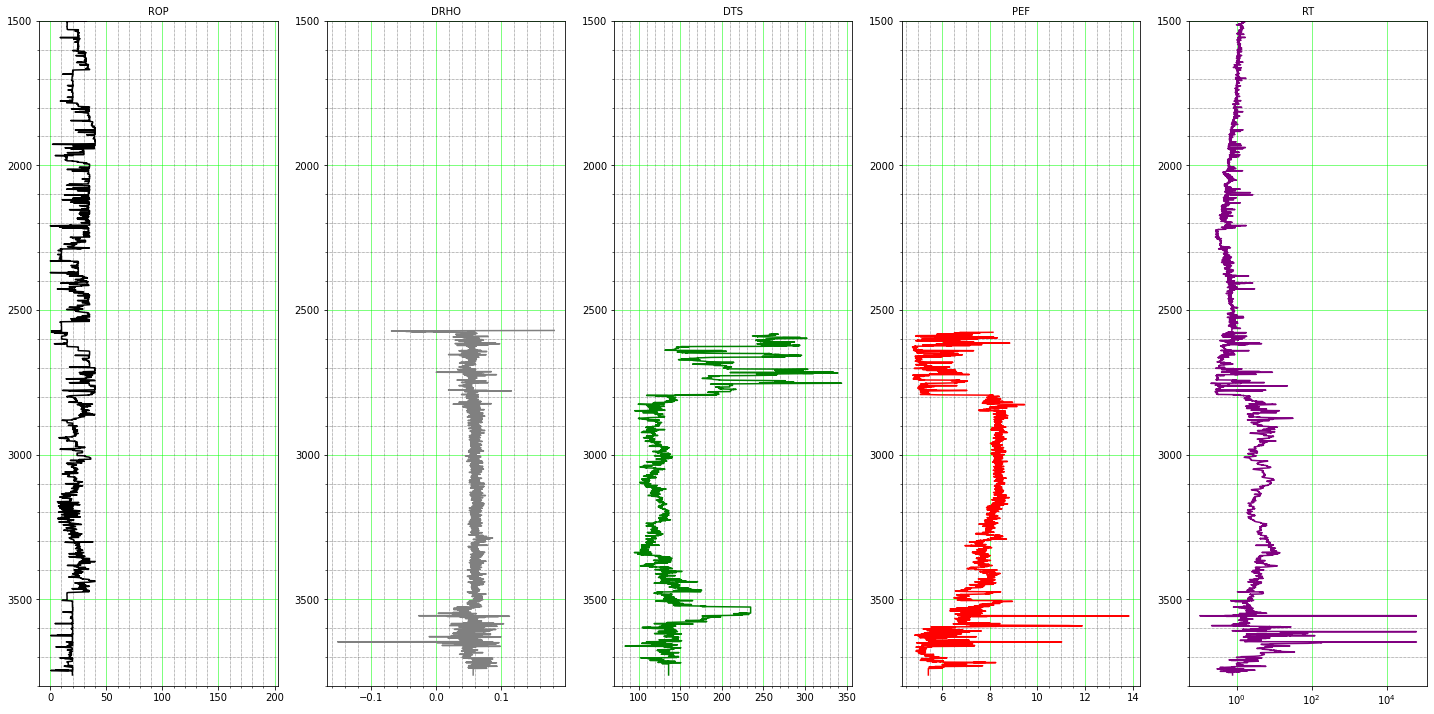

In [ ]:
# Visualize logs as instructed
COLUMN_SEMI = 4
min_depth = 1500
max_depth = 3800
well_log_display(well,'DEPTH',['ROP','DRHO','DTS','PEF','RT'],COLUMN_SEMI,min_depth,max_depth,colors=['black','grey','green','red','purple'])


### Make your triple combo

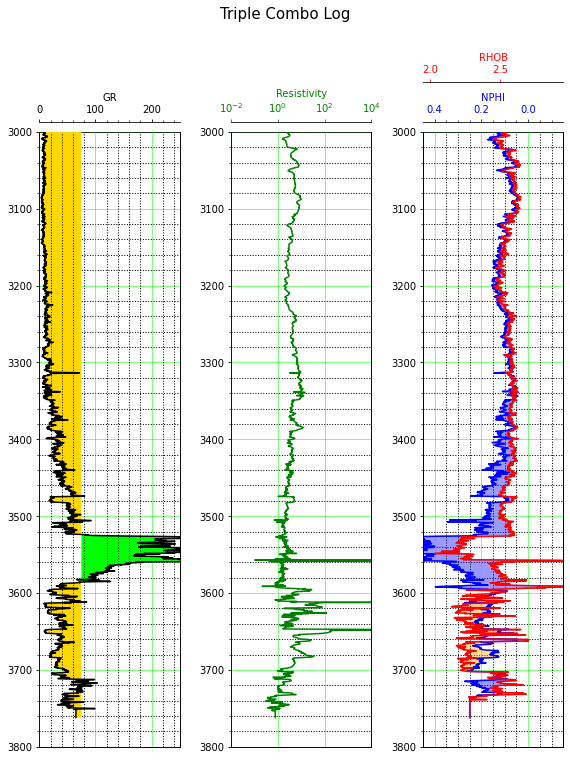

In [ ]:
# Make your triple combo as instructed
triple_combo(well,'DEPTH','GR','RT','NPHI','RHOB',min_depth=3000,max_depth=3800,max_GR=250,sand_GR_line=75,max_resistivity=10000)





### Make your Neutron-Density Plot

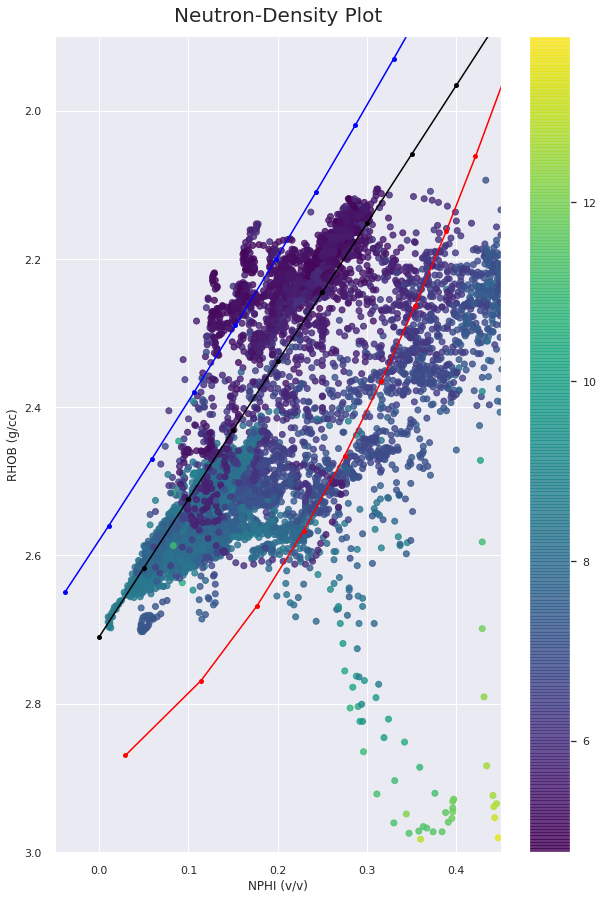

In [ ]:
# Make your Neutron-Density plot as instructed
from ND_plot import ND_plot
denfl=0.85
ND_plot(denfl,well,'NPHI','RHOB','PEF',color_by='continuous',figsize=(10,15),scatter_size=100,scatter_alpha=0.8)

### Compute PHIF and VSH on Sleipner Formation

In [ ]:
well['FMLOG'].unique()
Sleipner = well[well['FMLOG']=='Sleipner Fm. Top']
Sleipner

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FMLOG
35135,3702.0,2.253,2.270,2.304,2.260,8.5,8.703,0.046,83.706,136.617,48.506,0.233,6.090,1.694,1.662,1.476,2.272,1.295,19.196,1.295,1.476,1.295,Sleipner Fm. Top
35136,3702.1,2.257,2.290,2.350,2.271,8.5,8.703,0.044,80.906,132.663,46.782,0.222,6.144,1.794,1.692,1.544,2.298,1.418,19.193,1.418,1.544,1.418,Sleipner Fm. Top
35137,3702.2,2.262,2.319,2.419,2.287,8.5,8.703,0.043,78.083,127.499,47.631,0.204,6.180,1.816,1.697,1.621,2.334,1.610,19.189,1.610,1.621,1.610,Sleipner Fm. Top
35138,3702.3,2.263,2.358,2.493,2.312,8.5,8.703,0.042,75.068,120.885,51.011,0.184,6.204,1.816,1.694,1.771,2.376,2.003,19.182,2.005,1.771,2.003,Sleipner Fm. Top
35139,3702.4,2.267,2.405,2.550,2.354,8.5,8.750,0.042,71.860,112.672,52.438,0.161,6.210,1.809,1.682,2.107,2.417,3.150,17.338,3.152,2.107,3.150,Sleipner Fm. Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.270,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.250,5.428,0.689,0.668,0.751,2.284,0.770,19.738,0.741,0.737,0.770,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.270,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.250,5.428,0.689,0.668,0.751,2.284,0.770,19.751,0.741,0.737,0.770,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.270,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.250,5.428,0.689,0.668,0.751,2.284,0.770,19.764,0.741,0.737,0.770,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.270,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.250,5.428,0.689,0.668,0.751,2.284,0.770,19.757,0.741,0.737,0.770,Sleipner Fm. Top


In [ ]:
rho_ma    = 2.65        
rho_fl    = 0.9
gr_min    = 7
gr_max    = 105
A         = 0.4
B         = 0.01

In [ ]:
# Compute PHIF and VSH on Sleipner Formation
rhob_sleipner = Sleipner['RHOB']
phid_sleipner = (rho_ma - rhob_sleipner)/(rho_ma -rho_fl)
phid_sleipner

nphi_sleipner = Sleipner['NPHI']

phif_sleipner = phid_sleipner + (A*(nphi_sleipner-phid_sleipner))+B
phif_sleipner


35135    0.232800
35136    0.219486
35137    0.199943
35138    0.177543
35139    0.154286
           ...   
35730    0.235486
35731    0.235486
35732    0.235486
35733    0.235486
35734    0.235486
Length: 600, dtype: float64

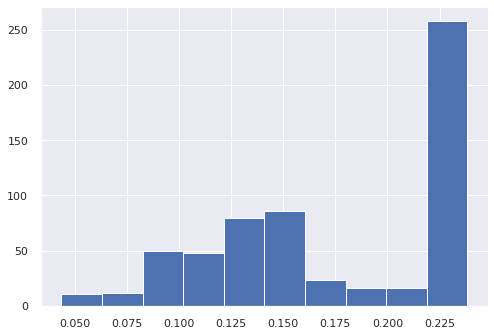

In [ ]:
import matplotlib.pyplot as plt

plt.hist(phif_sleipner,bins=10)
plt.show()

In [ ]:
# Compute PHIF and VSH on Sleipner Formation

gr_sleipner = Sleipner['GR']
vsh_sleipner = (gr_sleipner-gr_min)/(gr_max-gr_min)
vsh_sleipner

35135    0.423531
35136    0.405939
35137    0.414602
35138    0.449092
35139    0.463653
           ...   
35730    0.594469
35731    0.594469
35732    0.594469
35733    0.594469
35734    0.594469
Name: GR, Length: 600, dtype: float64

In [ ]:
vsh_sleipner.describe()

count    600.000000
mean       0.529694
std        0.167260
min        0.152296
25%        0.395268
50%        0.570230
75%        0.634383
max        0.982357
Name: GR, dtype: float64

## Assignment 2: Material Balance Analysis

Run this cell to get all the data and functions, all at once



In [ ]:
!git clone https://github.com/yohanesnuwara/pyreservoir

import sys
sys.path.append('/content/pyreservoir/matbal')

# these are the functions that we will use
from mbal import drygas, gascondensate, oil
from aquifer import veh

# this is the filepath to the data
prod_filepath = '/content/pyreservoir/data/dry_gas_with_overpressure.csv'

# these are the names that define each column in the data
columns = ['date', 'p', 'z', 'Gp', 'Bg']

Cloning into 'pyreservoir'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 819 (delta 85), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (819/819), 24.03 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (439/439), done.


The reservoir has the following properties:

* Formation compressibility is 19.5 microsip
* Water compressibility is 3 microsip
* Initial water saturation is 0.22
* Reservoir extent is 500 m (1 m = 3.281 ft)
* Reservoir thickness is 50 ft
* Porosity is 0.3
* Permeability is 250 md
* Water viscosity is 0.87 cp

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [BSCF]


Start your codes from here

In [ ]:
import pandas as pd
welldata = pd.read_csv(prod_filepath,header=None)
welldata.head(10)


,0,1,2,3,4
0,25 January 1966,11444,1.496,0.00,0.002672
1,1 February 1967,10674,1.438,9.92,0.002753
2,1 February 1968,10131,1.397,28.62,0.002818
3,1 June 1969,9253,1.330,53.60,0.002938
4,1 June 1970,8574,1.280,77.67,0.003051
5,1 June 1971,7906,1.230,101.42,0.003180
6,1 June 1972,7380,1.192,120.36,0.003301
7,1 September 1973,6847,1.154,145.01,0.003445
8,1 August 1974,6388,1.122,160.63,0.003590
9,1 August 1975,5827,1.084,182.34,0.003802


In [ ]:
welldata.columns = columns
welldata.head(10)

,date,p,z,Gp,Bg
0,25 January 1966,11444,1.496,0.00,0.002672
1,1 February 1967,10674,1.438,9.92,0.002753
2,1 February 1968,10131,1.397,28.62,0.002818
3,1 June 1969,9253,1.330,53.60,0.002938
4,1 June 1970,8574,1.280,77.67,0.003051
5,1 June 1971,7906,1.230,101.42,0.003180
6,1 June 1972,7380,1.192,120.36,0.003301
7,1 September 1973,6847,1.154,145.01,0.003445
8,1 August 1974,6388,1.122,160.63,0.003590
9,1 August 1975,5827,1.084,182.34,0.003802


In [ ]:
welldata['year'] = pd.DatetimeIndex(welldata['date']).year
welldata

,date,p,z,Gp,Bg,year
0,25 January 1966,11444,1.496,0.00,0.002672,1966
1,1 February 1967,10674,1.438,9.92,0.002753,1967
2,1 February 1968,10131,1.397,28.62,0.002818,1968
3,1 June 1969,9253,1.330,53.60,0.002938,1969
4,1 June 1970,8574,1.280,77.67,0.003051,1970
5,1 June 1971,7906,1.230,101.42,0.003180,1971
6,1 June 1972,7380,1.192,120.36,0.003301,1972
7,1 September 1973,6847,1.154,145.01,0.003445,1973
8,1 August 1974,6388,1.122,160.63,0.003590,1974
9,1 August 1975,5827,1.084,182.34,0.003802,1975


In [ ]:
welldata['year'].value_counts()

1979    1
1978    1
1977    1
1976    1
1975    1
1974    1
1973    1
1972    1
1971    1
1970    1
1969    1
1968    1
1967    1
1966    1
Name: year, dtype: int64

### Material balance plots

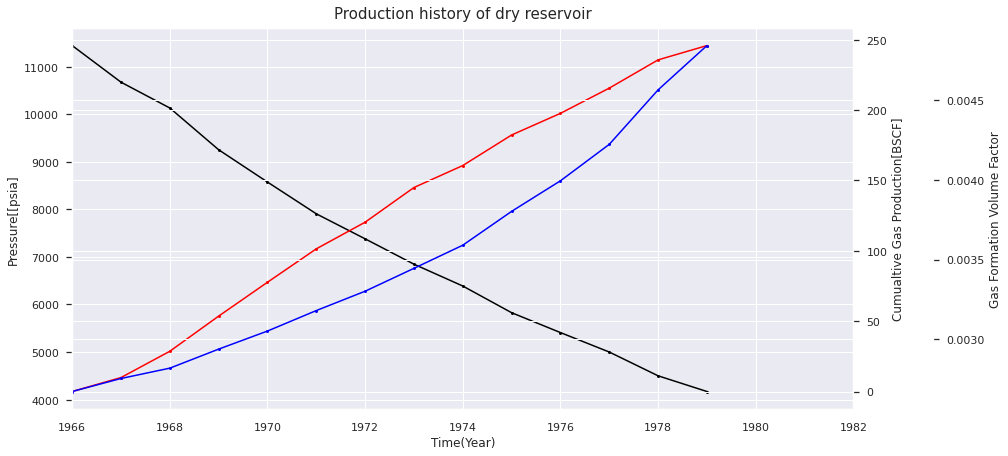

In [ ]:
# Make material balance plots 
t = welldata['year'].values
Gp = welldata['Gp'].values
p = welldata['p'].values
bg = welldata['Bg'].values


fig = plt.figure(figsize=(14,7))
host = fig.add_subplot(111)

part1 = host.twinx()
part2 = host.twinx()

host.plot(t,p,'.-',color='black')
part1.plot(t,Gp,'.-',color='red')
part2.plot(t,bg,'.-',color='blue')

host.set_title('Production history of dry reservoir',size=15,pad=10)
host.set_xlim(1966,1982)
host.set_xlabel('Time(Year)')
host.set_ylabel('Pressure[[psia]')
part1.set_ylabel('Cumualtive Gas Production[BSCF]')
part2.set_ylabel('Gas Formation Volume Factor')
part2.spines['right'].set_position(('outward',80))








plt.show()

/content/pyreservoir/matbal/mbal.py:143: RuntimeWarning: invalid value encountered in true_divide
  x3, y3 = Gp, (F / Eg)


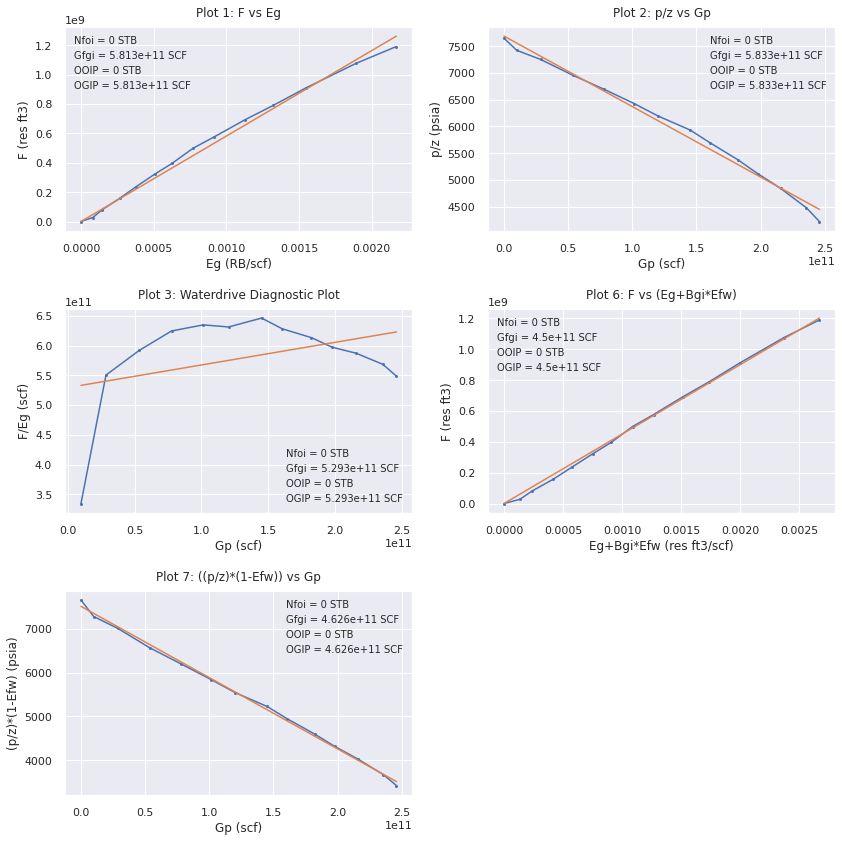

(array([0.00000000e+00, 2.73146208e+07, 8.06614632e+07, 1.57465544e+08,
        2.36991364e+08, 3.22496330e+08, 3.97332432e+08, 4.99523198e+08,
        5.76642424e+08, 6.93294971e+08, 7.89737575e+08, 9.10652386e+08,
        1.07606588e+09, 1.19078059e+09]),
 array([0.00000e+00, 8.16800e-05, 1.46550e-04, 2.65980e-04, 3.79450e-04,
        5.08000e-04, 6.29390e-04, 7.72940e-04, 9.18070e-04, 1.13040e-03,
        1.32221e-03, 1.55082e-03, 1.89282e-03, 2.17073e-03]),
 array([0.        , 0.01990154, 0.033936  , 0.05662892, 0.07417846,
        0.09144369, 0.10503877, 0.11881477, 0.13067815, 0.14517785,
        0.15598154, 0.16655262, 0.17947569, 0.18800492]))

In [ ]:
Bg = welldata['Bg'].values
Gp = welldata['Gp'].values*(1E+9)
cf = 19.5E-6
cw = 3E-6
swi = 0.22
z = welldata['z'].values

x = drygas()
F, Btg ,Efw , Eg = x.calculate_params(p,Bg,Gp,cf,cw,swi)

plt.figure(figsize=(12,12))
x.plot(p,z,Gp,F,Btg,Efw,Eg)

### Calculate aquifer influx using VEH model



In [ ]:
welldata['date'] = welldata['date'].astype('datetime64')
welldata

,date,p,z,Gp,Bg,year
0,1966-01-25,11444,1.496,0.00,0.002672,1966
1,1967-02-01,10674,1.438,9.92,0.002753,1967
2,1968-02-01,10131,1.397,28.62,0.002818,1968
3,1969-06-01,9253,1.330,53.60,0.002938,1969
4,1970-06-01,8574,1.280,77.67,0.003051,1970
5,1971-06-01,7906,1.230,101.42,0.003180,1971
6,1972-06-01,7380,1.192,120.36,0.003301,1972
7,1973-09-01,6847,1.154,145.01,0.003445,1973
8,1974-08-01,6388,1.122,160.63,0.003590,1974
9,1975-08-01,5827,1.084,182.34,0.003802,1975


In [ ]:
# Calculate aquifer influx
r_R = 500*3.281
h = 50
poro = 0.3
cf = 19.5E-6
cw = 3E-6

y = veh()
B = y.calculate_aquifer_constant(r_R,h,cf,cw,poro)
B


1016.380520915625

In [ ]:
datetime = welldata['date'].values
perm = 250
mu_w = 0.87
B_star = B

We_veh = y.calculate_aquifer(datetime,p,cf,cw,perm,poro,mu_w,r_R,B_star)
We_veh




[0.0,
 7733155.196780589,
 26200775.895284206,
 62632737.24685632,
 100895938.40778142,
 146947283.60476923,
 199464553.08789238,
 270582760.66471225,
 327441127.34373164,
 395021145.72357535,
 457775605.64596975,
 532207340.77085656,
 625945694.3845456,
 709984246.8177946]

### Plot the aquifer influx

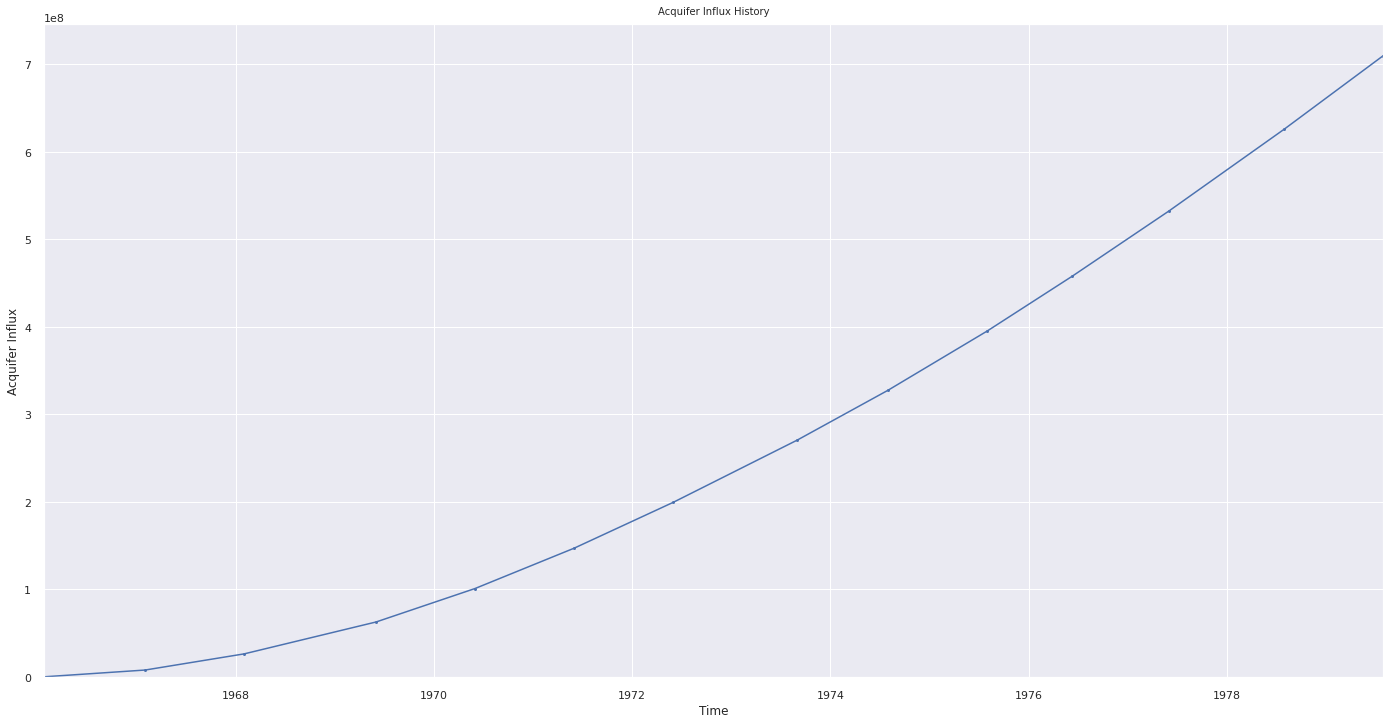

In [ ]:
# Plot the aquifer influx

plt.figure(figsize=(24,12))
plt.plot(datetime,We_veh,'.-')
plt.xlim(min(datetime),max(datetime))
plt.ylim(ymin=0)
plt.xlabel('Time')
plt.ylabel('Acquifer Influx')
plt.title("Acquifer Influx History",size=10,pad=10)
plt.show()
